# Weather API
Our exercise uses api using a service from https://www.7timer.info.

The retrieved data in json format and store in variable `data`.

In [1]:
import requests

ret=requests.get('https://www.7timer.info/bin/civil.php?lon=100.5&lat=13.7&ac=0&unit=metric&output=json&tzshift=0')
data=ret.json()

Observe the data

In [2]:
import json
print(json.dumps(data,indent=4))

{
    "product": "civil",
    "init": "2025011318",
    "dataseries": [
        {
            "timepoint": 3,
            "cloudcover": 9,
            "lifted_index": 15,
            "prec_type": "none",
            "prec_amount": 0,
            "temp2m": 18,
            "rh2m": "47%",
            "wind10m": {
                "direction": "W",
                "speed": 2
            },
            "weather": "cloudynight"
        },
        {
            "timepoint": 6,
            "cloudcover": 9,
            "lifted_index": 15,
            "prec_type": "none",
            "prec_amount": 0,
            "temp2m": 17,
            "rh2m": "50%",
            "wind10m": {
                "direction": "NW",
                "speed": 2
            },
            "weather": "cloudyday"
        },
        {
            "timepoint": 9,
            "cloudcover": 9,
            "lifted_index": 15,
            "prec_type": "none",
            "prec_amount": 0,
            "temp2m": 23,
            "

## Get temperature Without pandas
Use `Matplotlib`, a library for building static, animated, and interactive visualizations in Python, https://matplotlib.org/stable/api/index.html with `pyplot` module.

`matplotlib.pyplot.plot(x, y)` to plot y versus x using default line style and color

In [4]:
import matplotlib.pyplot as plt

# Accecss json array 'dataseries' for temp2m and timepoint
# Series of temp2m
temps = [d['temp2m'] for d in data['dataseries']]

# Series of timepoint
times = [d['timepoint'] for d in data['dataseries']]

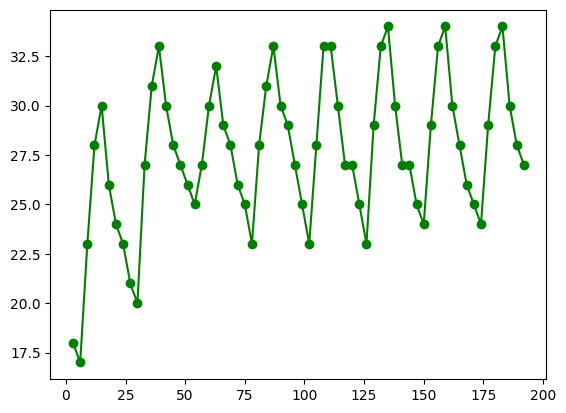

In [7]:
# Plot x=times, y=temps
plt.plot(times,
         temps,
         'go-')

**Change time to datetime Object**

Use `datetime.strptime()` as shown in previous exercise.

In [10]:
from datetime import datetime, timedelta

initTime = datetime.strptime(data['init'], '%Y%m%d%H')
temps = [d['temp2m'] for d in data['dataseries']]
times = [initTime+timedelta(hours=d['timepoint']+7) for d in data['dataseries']]

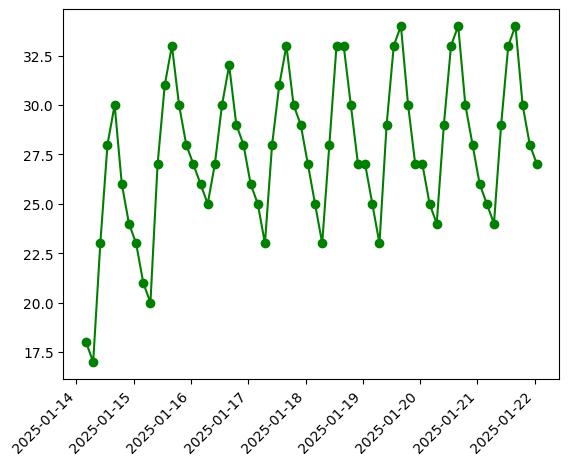

In [14]:
# Plot x=times, y=temps
plt.plot(times,
         temps,
         'go-')
plt.xticks(rotation=45, ha='right')
plt.show()

## With pandas

Create `DataFrame` from dataseries in the `data`.

In [15]:
import pandas as pd

weather_df = pd.DataFrame(data['dataseries'])
weather_df.head()

,timepoint,cloudcover,lifted_index,prec_type,prec_amount,temp2m,rh2m,wind10m,weather
0,3,9,15,none,0,18,47%,"{'direction': 'W', 'speed': 2}",cloudynight
1,6,9,15,none,0,17,50%,"{'direction': 'NW', 'speed': 2}",cloudyday
2,9,9,15,none,0,23,40%,"{'direction': 'NW', 'speed': 2}",cloudyday
3,12,7,15,none,0,28,32%,"{'direction': 'N', 'speed': 2}",mcloudyday
4,15,7,15,none,0,30,37%,"{'direction': 'N', 'speed': 2}",mcloudyday


To plot temperature vervus datetime :
*   Create `dt` column from `timepoint` column, to contain corresponding `datetime` object.
*   Slice `weather_df` DataFrame to extract only `temp2m` and `dt` columns
*   Set `dt` to be index of the DataFrame
*   Plot a line graph



<Axes: xlabel='dt'>

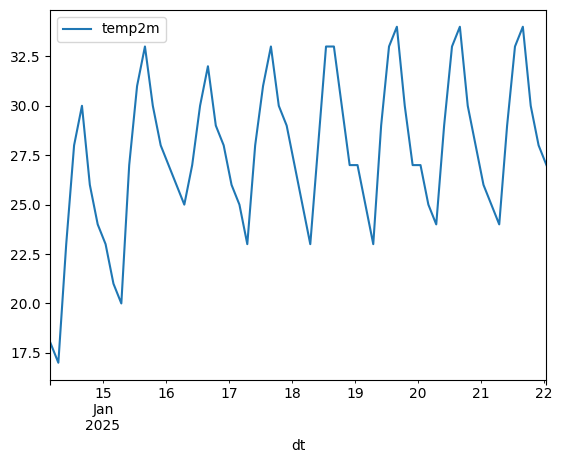

In [23]:
initTime = datetime.strptime(data['init'], '%Y%m%d%H')
weather_df['dt'] = weather_df['timepoint'].apply(lambda x: initTime+timedelta(hours=x+7))
weather_df[['temp2m','dt']].set_index('dt').plot()